Analiza Danych Sklepu GryNar

Witajcie w raporcie analizy danych dotyczącej GryNar - miejscu, które nie tylko oferuje gry do kupienia i wypożyczenia, ale także organizuje turnieje dla pasjonatów. Skupimy się na kluczowych aspektach działalności, takich jak pracownik miesiąca, najlepsi zawodnicy oraz gra generująca największe dochody. Poprzez tę analizę dążymy do lepszego zrozumienia naszej działalności i doskonalenia usług, aby zapewnić klientom wyjątkowe doświadczenia gamingowe.

Zapraszamy do odkrywania prezentowanych danych i wnioskowania z nich, co pomoże nam kontynuować naszą misję jako liderów w świecie gamingu.

Z wyrazami szacunku,

Zespół GryNar

In [5]:
from Analiza_danych import *
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import numpy as np


In [6]:
con = mysql.connector.connect(
                host = "127.0.0.1",
                user = "root",
                password = "password",
                database = "clients_base",
               
                )
if not con:
                raise Exception("connection error")
cs = con.cursor()

Tabela poniżej przedstawia najlepszych pracowników w każdy miesiącu działania sklepu.

In [7]:
df = pd.DataFrame(staff_ranking(cs),columns=["Date","Staff_id","First_name","Last_Name","Earn"])
df


,Date,Staff_id,First_name,Last_Name,Earn
0,2023-04,1,Kamil,Wojciechowski,93
1,2023-03,1,Kamil,Wojciechowski,405
2,2023-02,3,Jolanta,Kowalczyk,291
3,2023-01,2,Oskar,Zieliński,307
4,2022-12,1,Kamil,Wojciechowski,232
5,2022-11,3,Jolanta,Kowalczyk,294
6,2022-10,1,Kamil,Wojciechowski,144
7,2022-09,4,Zbigniew,Wróbel,205
8,2022-08,3,Jolanta,Kowalczyk,293
9,2022-07,4,Zbigniew,Wróbel,405


Tabela poniżej przedstawia graczy turniejowych w grze każdej grze.

In [8]:
df=pd.DataFrame(best_players(cs),columns=["Game_title","First_name","Last_name","Num_of_wins"])
df

,Game_title,First_name,Last_name,Num_of_wins
0,Doubletrack,Helena,Dudek,4
1,Unstable Unicorns: NSFW Base Game,Halina,Malinowska,5
2,Columbo Detective Game,Roman,Walczak,5
3,Changgi,Natalia,Zając,6
4,The Way of the Bear,Maria,Woźniak,4
5,Eaten By Zombies!: In Cahoots,Dominika,Malinowska,4
6,"The Dark Sands: War in North Africa, 1940-42",Zbigniew,Dąbrowski,3
7,Strain,Krystyna,Lewandowska,4
8,Chebache,Marta,Jankowska,4
9,Rail Raiders Infinite,Antoni,Jankowski,4


Tabela poniżej przedstawia 5 najlepszych graczy turniejowych w grze Robinson Crusoe: Adventures on the Cursed Island.

In [9]:

df = pd.DataFrame(top_10_tournament_players(cs,g_id=4),columns=["Game_title","First_name","Last_name","Num_of_wins"])
df[["First_name","Last_name","Num_of_wins"]].head()

,First_name,Last_name,Num_of_wins
0,Andrzej,Malinowski,1
1,Monika,Szymańska,1
2,Natalia,Zając,1
3,Renata,Woźniak,1
4,Aneta,Zając,1


Tabela przedstawia 5 najlepiej zarabiających gier na sprzedaży

In [10]:

df = pd.DataFrame(top5_selers_AND_rental(cs)[1],columns=["Game Title", "Sum of rental amount"])
df

,Game Title,Sum of rental amount
0,Wu Hsing,1471
1,Dots,860
2,Blitzkrieg 1940,766
3,DreadBall: The Futuristic Sports Game,734
4,Reanimator,671


Tabela przedstawia 5 Najdłuższych turniejów

In [11]:
df=pd.DataFrame(longest_tournament(cs),columns=["id_gry","Tytuł","czas trwania turnieju[min]"])
df.head()

,id_gry,Tytuł,czas trwania turnieju[min]
0,7,"The Dark Sands: War in North Africa, 1940-42",10147
1,8,Strain,10146
2,8,Strain,10145
3,8,Strain,10144
4,7,"The Dark Sands: War in North Africa, 1940-42",10144


Przyjrzymy się liczbie kupionych gier względem ilości wyporzyczeń.

(array([70., 52., 34., 11.,  6.,  4.]),
 array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
        4.16666667, 5.        ]),
 <BarContainer object of 6 artists>)

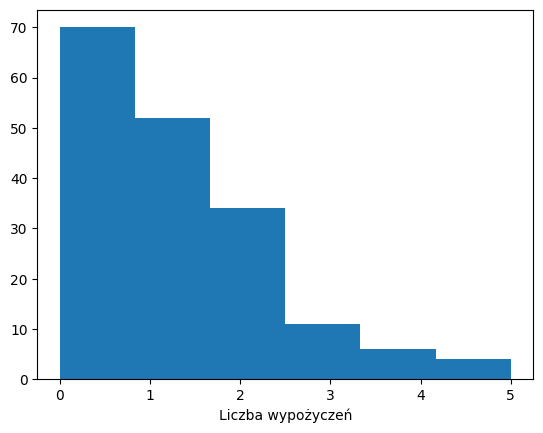

In [12]:
df = pd.DataFrame(sells_VS_rental_num(cs))
plt.xlabel("Liczba wypożyczeń")
plt.hist(df,bins=6)



Dopasowujemy rozkład poissona do naszych danych.

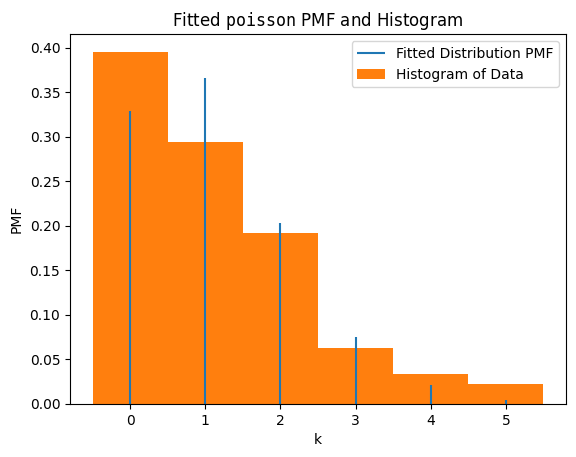

  params: FitParams(mu=1.1129943195873853, loc=0.0)
 success: True
 message: 'Optimization terminated successfully.'


In [13]:

df = pd.DataFrame(sells_VS_rental_num(cs))

dist = scipy.stats.poisson
bounds = [(-100,100)]
res = stats.fit(dist,df[0],bounds)
res.plot()
plt.show()

print(res)


Przeprowadzamy test chi kwadrat.
H0 - Dane pochodzą z rozkładu Poissona.
H1 - Dane nie pochodzą z rozkładu Poissona.

In [14]:

data = df[0]

obs_freq, bin_edges = np.histogram(data, bins=range(0, max(data)+2))

# Oblicz częstości oczekiwane na podstawie rozkładu Poissona
mu = np.mean(data)
poisson_dist = stats.poisson(mu)
exp_freq = len(data) * poisson_dist.pmf(np.arange(0, max(data)+1))

# Jeśli są kategorie z częstością oczekiwaną mniejszą niż 5, połącz je
# Tutaj dodamy oczekiwane częstości dla wartości większych od pewnej granicy
# aby uniknąć częstości oczekiwanych mniejszych niż 5
exp_freq = np.append(exp_freq, len(data) * (1 - poisson_dist.cdf(max(data))))
obs_freq = np.append(obs_freq, sum(data > max(data)))

# Test Chi-kwadrat
chi2_stat, p_val = stats.chisquare(obs_freq, f_exp=exp_freq)
print(f'Chi2 Statistic: {chi2_stat}, p-value: {p_val}')

Chi2 Statistic: 19.185546740009755, p-value: 0.003861483299430744


P-value mniejsze od 0.05 oznacza, ze odrzucamy hipotezę zerową.